In [1]:
from models.cnn import ConvolutionalNeuralNetwork
from data_helper import DataHelper
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import LSTM
from keras.layers import ConvLSTM2D
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
print(tf.__version__)

Using TensorFlow backend.


2.0.0


In [2]:
dh = DataHelper()
dh.get_all_columns_names()

Index(['pool', 'lines_reserved', 'time', 'day_of_week', 'month', 'day', 'hour',
       'minute', 'holiday', 'reserved_Lavoda', 'reserved_Club Junior',
       'reserved_Elab', 'reserved_Vodnik', 'reserved_Spirala',
       'reserved_Amalka', 'reserved_Dukla', 'reserved_Lodicka',
       'reserved_Elab team', 'reserved_Sports Team', 'reserved_Modra Hvezda',
       'reserved_VSC MSMT', 'reserved_Orka', 'reserved_Activity',
       'reserved_Aquamen', 'reserved_Zralok', 'reserved_SK Impuls',
       'reserved_Motylek', 'reserved_3fit', 'reserved_Jitka Vachtova',
       'reserved_Hodbod', 'reserved_DUFA', 'reserved_The Swim',
       'reserved_Neptun', 'reserved_Strahov Cup', 'reserved_Apneaman',
       'reserved_Michovsky', 'reserved_Betri', 'reserved_Pospisil',
       'reserved_Vachtova', 'reserved_Riverside', 'reserved_Vodni polo Sparta',
       'reserved_Road 2 Kona', 'reserved_Water Polo Sparta Praha',
       'reserved_Sucha', 'reserved_Totkovicova', 'reserved_DDM Spirala',
       'reserved

In [16]:
columns = ['pool','lines_reserved','day_of_week','month','minute_of_day','year','reserved_Vodnik'] 
# columns = list(dh.get_all_columns_names())
# columns.remove('time')
time_steps_back = 5
x_train, y_train, x_test, y_test = dh.generate_feature_vectors_for_cnn(columns, time_steps_back)

In [17]:
estimator = ConvolutionalNeuralNetwork()
estimator.time_steps_back = time_steps_back
estimator.columns = columns
estimator.build_model()
print(estimator.model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 4, 64)             960       
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 2, 64)             0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               12900     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 101       
Total params: 13,961
Trainable params: 13,961
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
n_features = len(estimator.columns)
estimator.model = Sequential()
# estimator.model.add(Flatten(input_shape=(estimator.time_steps_back, n_features)))
# estimator.model.add(Dense(int(estimator.time_steps_back*n_features), activation='relu'))
# estimator.model.add(Dropout(0.2))
# estimator.model.add(Dense(int(estimator.time_steps_back*n_features), activation='relu'))
# estimator.model.add(Dropout(0.2))
# estimator.model.add(Dense(int(estimator.time_steps_back*n_features), activation='relu'))

# estimator.model.add(Conv1D(filters=120, kernel_size=2, activation='relu', input_shape=(time_steps_back, n_features)))
# estimator.model.add(MaxPooling1D(pool_size=2))
# estimator.model.add(Conv1D(filters=60, kernel_size=2, activation='relu'))
# estimator.model.add(Dropout(0.2))
# estimator.model.add(Flatten())
# estimator.model.add(Dense(100, activation='relu'))
# estimator.model.add(Dense(1))
# estimator.model.compile(optimizer='adam', loss='mse')

# estimator.model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps_back, n_features)))
# estimator.model.add(LSTM(50, activation='relu'))

estimator.model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_steps_back, n_features)))
estimator.model.add(LSTM(50, activation='relu'))

estimator.model.add(Dense(1))
estimator.model.compile(optimizer='adam', loss='mse')
print(estimator.model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 4, 64)             960       
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                23000     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 51        
Total params: 24,011
Trainable params: 24,011
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
estimator.fit(x_train, y_train, 5)
#estimator.load_model()

Train on 70393 samples, validate on 30169 samples
Epoch 1/5
70393/70393 [==============================] - 44s 620us/step - loss: 0.0015 - val_loss: 9.4456e-04
Epoch 2/5
70393/70393 [==============================] - 42s 593us/step - loss: 7.9590e-04 - val_loss: 8.6898e-04
Epoch 3/5
70393/70393 [==============================] - 42s 592us/step - loss: 7.6364e-04 - val_loss: 8.5114e-04
Epoch 4/5
70393/70393 [==============================] - 42s 593us/step - loss: 7.4567e-04 - val_loss: 8.3949e-04
Epoch 5/5
70393/70393 [==============================] - 42s 593us/step - loss: 7.2437e-04 - val_loss: 8.7839e-04
CNN model saved to disk


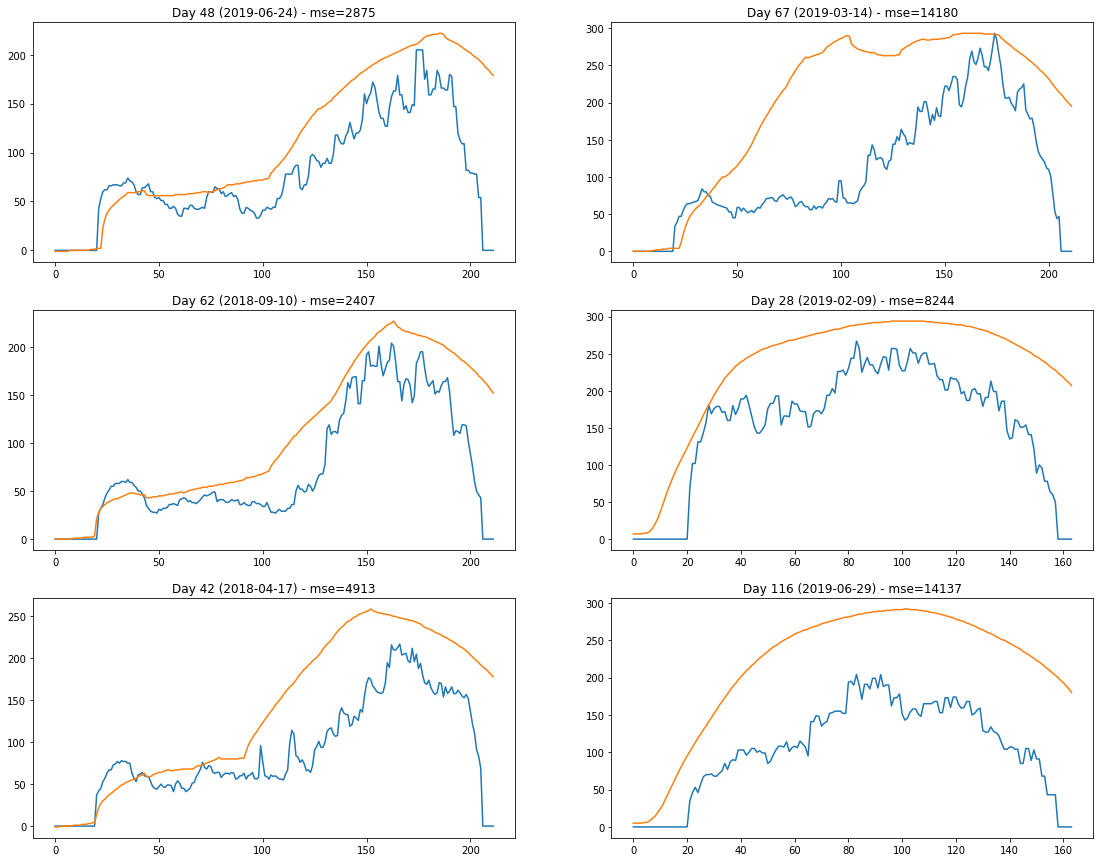

In [21]:
dh.show_n_days_prediction(estimator.model, columns, 6, time_steps_back, True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 5, 50)             12400     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 51        
Total params: 32,651
Trainable params: 32,651
Non-trainable params: 0
_________________________________________________________________
None
Train on 70393 samples, validate on 30169 samples
Epoch 1/100
70393/70393 [==============================] - 83s 1ms/step - loss: 0.0024 - val_loss: 9.8540e-04
Epoch 2/100
70393/70393 [==============================] - 82s 1ms/step - loss: 8.4198e-04 - val_loss: 8.4797e-04
Epoch 3/100
70393/70393 [==============================] - 82s 1ms/step - loss: 7.7317e-04 - val_loss: 8.7396e-04
Epoch 4/1

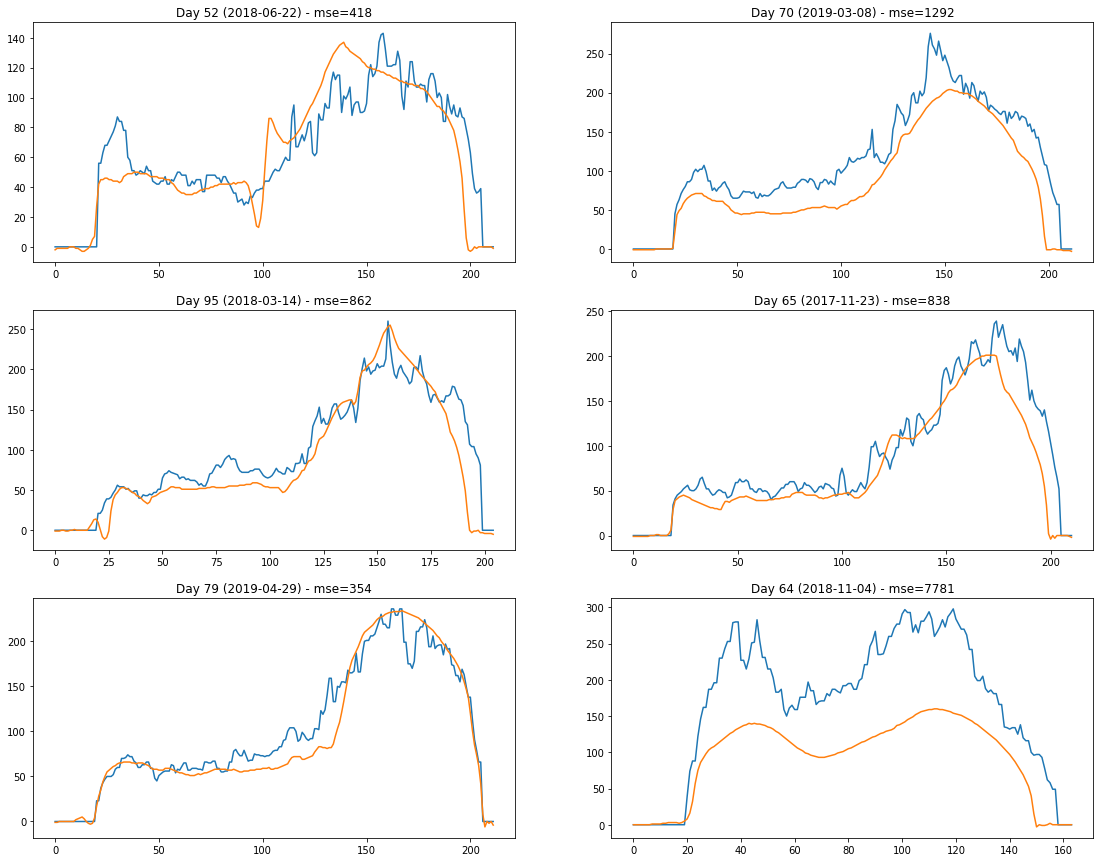

In [22]:
columns = ['pool','lines_reserved','day_of_week','month','minute_of_day','year','reserved_Vodnik','temperature_binned', 'wind_binned', 'humidity_binned',
       'precipitation_binned'] 
time_steps_back = 5
x_train, y_train, x_test, y_test = dh.generate_feature_vectors_for_cnn(columns, time_steps_back)
estimator = ConvolutionalNeuralNetwork('lstm_model_with_weather')
estimator.time_steps_back = time_steps_back
estimator.columns = columns
n_features = len(estimator.columns)

estimator.model = Sequential()
estimator.model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps_back, n_features)))
estimator.model.add(LSTM(50, activation='relu'))
estimator.model.add(Dense(1))
estimator.model.compile(optimizer='adam', loss='mse')

print(estimator.model.summary())

estimator.fit(x_train, y_train, 100)
dh.show_n_days_prediction(estimator.model, columns, 6, time_steps_back, True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 8, 50)             11600     
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 51        
Total params: 31,851
Trainable params: 31,851
Non-trainable params: 0
_________________________________________________________________
None
Train on 69320 samples, validate on 29709 samples
Epoch 1/100
69320/69320 [==============================] - 117s 2ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 2/100
69320/69320 [==============================] - 115s 2ms/step - loss: 9.6071e-04 - val_loss: 0.0011
Epoch 3/100
69320/69320 [==============================] - 115s 2ms/step - loss: 8.6698e-04 - val_loss: 9.7247e-04
Epoch 4/100
69

69320/69320 [==============================] - 117s 2ms/step - loss: 6.1869e-04 - val_loss: 7.5341e-04
Epoch 66/100
69320/69320 [==============================] - 117s 2ms/step - loss: 6.2169e-04 - val_loss: 7.7472e-04
Epoch 67/100
69320/69320 [==============================] - 117s 2ms/step - loss: 6.1414e-04 - val_loss: 7.3968e-04
Epoch 68/100
69320/69320 [==============================] - 117s 2ms/step - loss: 6.1590e-04 - val_loss: 7.6573e-04
Epoch 69/100
69320/69320 [==============================] - 117s 2ms/step - loss: 6.1405e-04 - val_loss: 7.9946e-04
Epoch 70/100
69320/69320 [==============================] - 117s 2ms/step - loss: 6.1789e-04 - val_loss: 7.6920e-04
Epoch 71/100
69320/69320 [==============================] - 117s 2ms/step - loss: 6.1175e-04 - val_loss: 7.5931e-04
Epoch 72/100
69320/69320 [==============================] - 117s 2ms/step - loss: 6.1512e-04 - val_loss: 7.3581e-04
Epoch 73/100
69320/69320 [==============================] - 117s 2ms/step - loss: 6.1

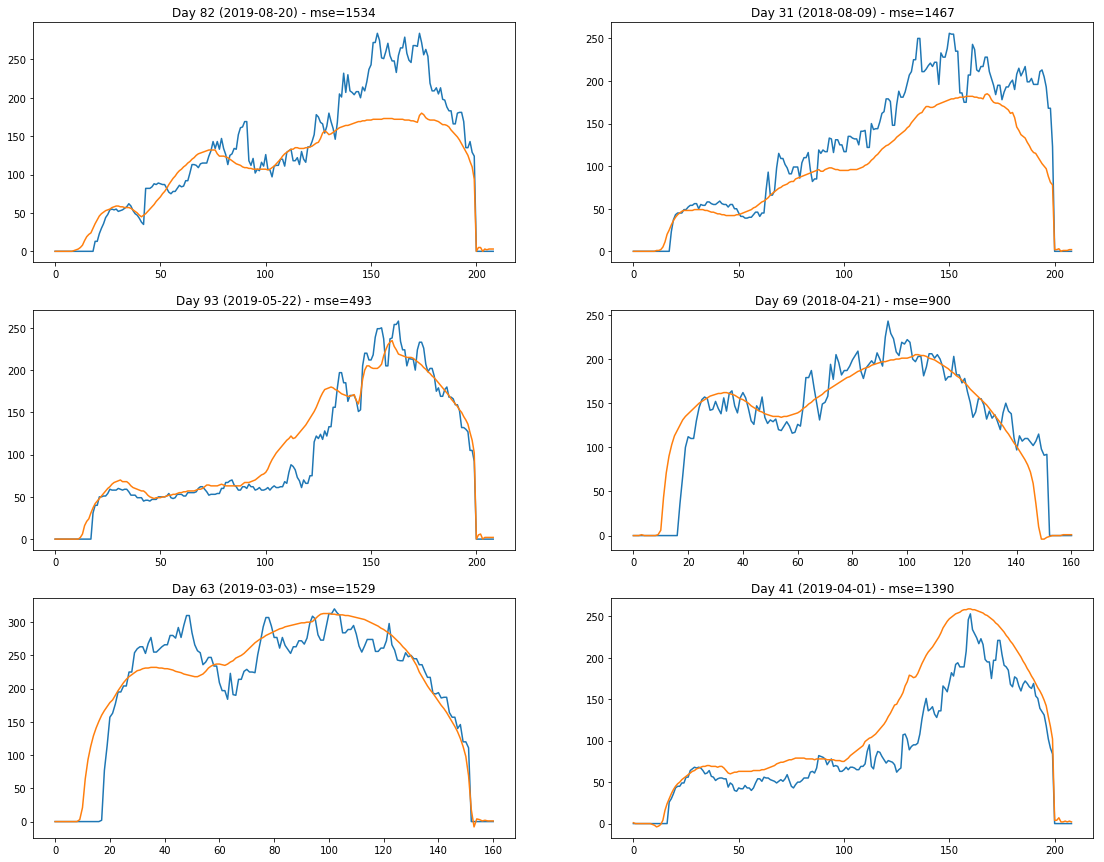

In [23]:
columns = ['pool','lines_reserved','day_of_week','month','minute_of_day','year','reserved_Vodnik'] 
time_steps_back = 8
x_train, y_train, x_test, y_test = dh.generate_feature_vectors_for_cnn(columns, time_steps_back)
estimator = ConvolutionalNeuralNetwork('lstm_model_8ts')
estimator.time_steps_back = time_steps_back
estimator.columns = columns
n_features = len(estimator.columns)

estimator.model = Sequential()
estimator.model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps_back, n_features)))
estimator.model.add(LSTM(50, activation='relu'))
estimator.model.add(Dense(1))
estimator.model.compile(optimizer='adam', loss='mse')

print(estimator.model.summary())

estimator.fit(x_train, y_train, 100)
dh.show_n_days_prediction(estimator.model, columns, 6, time_steps_back, True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 5, 50)             11600     
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 51        
Total params: 31,851
Trainable params: 31,851
Non-trainable params: 0
_________________________________________________________________
None
Train on 70393 samples, validate on 30169 samples
Epoch 1/100
70393/70393 [==============================] - 83s 1ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 2/100
70393/70393 [==============================] - 82s 1ms/step - loss: 8.2749e-04 - val_loss: 8.7666e-04
Epoch 3/100
70393/70393 [==============================] - 83s 1ms/step - loss: 7.6930e-04 - val_loss: 8.8791e-04
Epoch 4/100
7

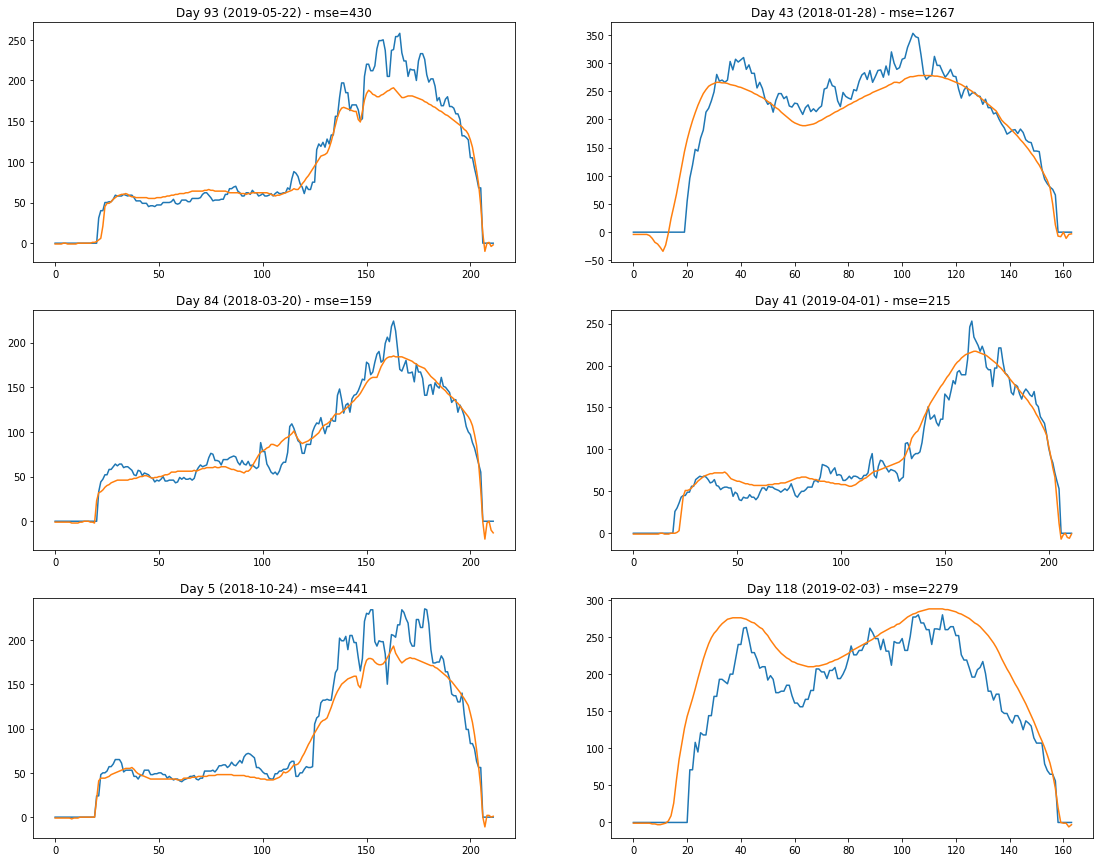

In [24]:
columns = ['pool','lines_reserved','day_of_week','month','minute_of_day','year','reserved_Vodnik'] 
time_steps_back = 5
x_train, y_train, x_test, y_test = dh.generate_feature_vectors_for_cnn(columns, time_steps_back)
estimator = ConvolutionalNeuralNetwork('lstm_model_5ts')
estimator.time_steps_back = time_steps_back
estimator.columns = columns
n_features = len(estimator.columns)

estimator.model = Sequential()
estimator.model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps_back, n_features)))
estimator.model.add(LSTM(50, activation='relu'))
estimator.model.add(Dense(1))
estimator.model.compile(optimizer='adam', loss='mse')

print(estimator.model.summary())

estimator.fit(x_train, y_train, 100)
dh.show_n_days_prediction(estimator.model, columns, 6, time_steps_back, True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 4, 128)            1920      
_________________________________________________________________
lstm_10 (LSTM)               (None, 4, 50)             35800     
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 51        
Total params: 57,971
Trainable params: 57,971
Non-trainable params: 0
_________________________________________________________________
None
Train on 70393 samples, validate on 30169 samples
Epoch 1/100
70393/70393 [==============================] - 77s 1ms/step - loss: 0.0018 - val_loss: 8.6056e-04
Epoch 2/100
70393/70393 [==============================] - 75s 1ms/step - loss: 7.8588e-04 - val_loss: 8.

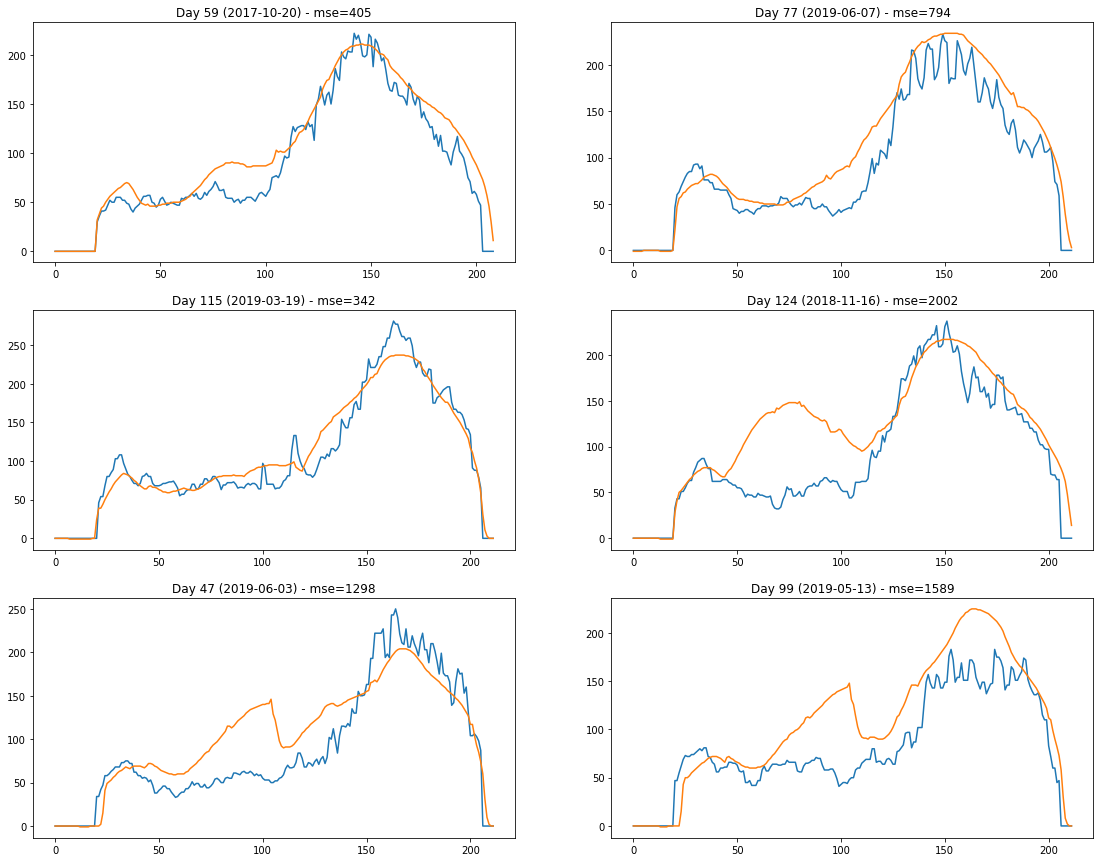

In [25]:
columns = ['pool','lines_reserved','day_of_week','month','minute_of_day','year','reserved_Vodnik'] 
time_steps_back = 5
x_train, y_train, x_test, y_test = dh.generate_feature_vectors_for_cnn(columns, time_steps_back)
estimator = ConvolutionalNeuralNetwork('lstm_cnn_model')
estimator.time_steps_back = time_steps_back
estimator.columns = columns
n_features = len(estimator.columns)

estimator.model = Sequential()
estimator.model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(time_steps_back, n_features)))
estimator.model.add(LSTM(50, activation='relu', return_sequences=True))
estimator.model.add(LSTM(50, activation='relu'))
estimator.model.add(Dense(1))
estimator.model.compile(optimizer='adam', loss='mse')

print(estimator.model.summary())

estimator.fit(x_train, y_train, 100)
dh.show_n_days_prediction(estimator.model, columns, 6, time_steps_back, True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 50)             12400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 32,651
Trainable params: 32,651
Non-trainable params: 0
_________________________________________________________________
None
Train on 70393 samples, validate on 30169 samples
Epoch 1/10
70393/70393 [==============================] - 8s 114us/step - loss: 0.0023 - val_loss: 9.8550e-04
Epoch 2/10
70393/70393 [==============================] - 8s 112us/step - loss: 8.4864e-04 - val_loss: 9.2418e-04
Epoch 3/10
70393/70393 [==============================] - 8s 110us/step - loss: 7.8352e-04 - val_loss

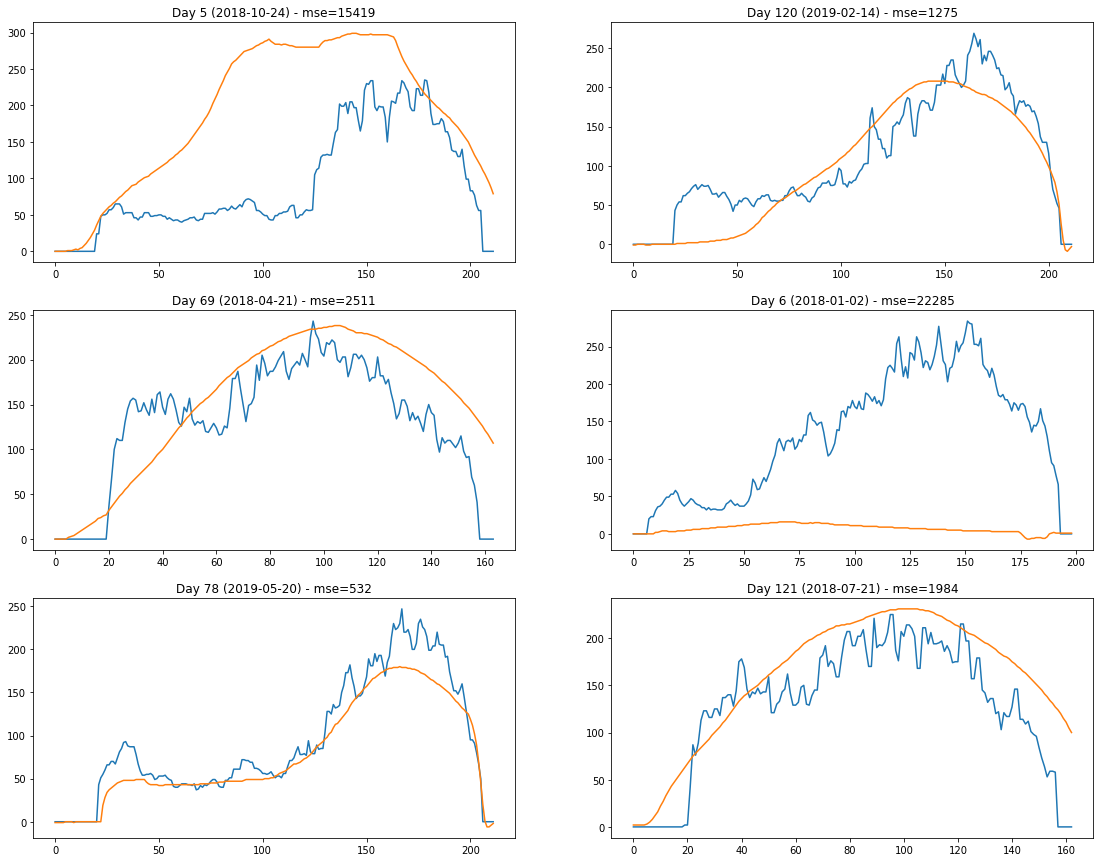

In [5]:
columns = ['pool','lines_reserved','day_of_week','month','minute_of_day','year','reserved_Vodnik','temperature_binned', 'wind_binned', 'humidity_binned', 'precipitation_binned'] 
time_steps_back = 5
x_train, y_train, x_test, y_test = dh.generate_feature_vectors_for_cnn(columns, time_steps_back)
estimator = ConvolutionalNeuralNetwork('lstm_model_good')
estimator.time_steps_back = time_steps_back
estimator.columns = columns
n_features = len(estimator.columns)

estimator.model = Sequential()
estimator.model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps_back, n_features)))
estimator.model.add(LSTM(50, activation='relu'))
estimator.model.add(Dense(1))
estimator.model.compile(optimizer='adam', loss='mse')

print(estimator.model.summary())

# with tf.device('/cpu:0'):
#     estimator.fit(x_train, y_train, 10)
estimator.fit(x_train, y_train, 10)
dh.show_n_days_prediction(estimator.model, columns, 6, time_steps_back, True)

In [31]:
estimator.model = Sequential()
estimator.model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps_back, n_features)))
estimator.model.add(LSTM(50, activation='relu'))
estimator.model.add(Dense(1))
estimator.model.compile(optimizer='adam', loss='mse')

print(estimator.model.summary())

with tf.device('/cpu:0'):
    estimator.fit(x_train, y_train, 10)

dh.show_n_days_prediction(estimator.model, columns, 6, time_steps_back, True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 5, 50)             12400     
_________________________________________________________________
lstm_15 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 51        
Total params: 32,651
Trainable params: 32,651
Non-trainable params: 0
_________________________________________________________________
None
Train on 70393 samples, validate on 30169 samples
Epoch 1/10
70393/70393 [==============================] - 86s 1ms/step - loss: 0.0024 - val_loss: 0.0011
Epoch 2/10
70393/70393 [==============================] - 84s 1ms/step - loss: 8.5570e-04 - val_loss: 8.8817e-04
Epoch 3/10
48768/70393 [===================>..........] - ETA: 22s - loss: 8.0560e-04

KeyboardInterrupt: 

In [3]:
columns = ['pool','lines_reserved','day_of_week','month','minute_of_day','year']
time_steps_back = 4
cnn = ConvolutionalNeuralNetwork('lstm_work')
cnn.time_steps_back = time_steps_back
cnn.columns = columns
cnn.load_model()
dh.mse_on_testing_days(cnn.model, columns, time_steps_back, True)

9061.758293838862 4
8048.66 6
7023.230303030303 16
2346.7652582159626 24
2401.6619718309857 26
5673.943661971831 30
2641.4727272727273 43
3068.3939393939395 54
2709.0798122065726 58
10139.933333333332 83
3251.305164319249 86
2343.3212121212123 87
4349.660606060606 90
2609.521212121212 96
18138.50704225352 104
2272.612121212121 110
3113.030303030303 112
2586.672727272727 116
2039.7560975609756 121


1256.6540744396134

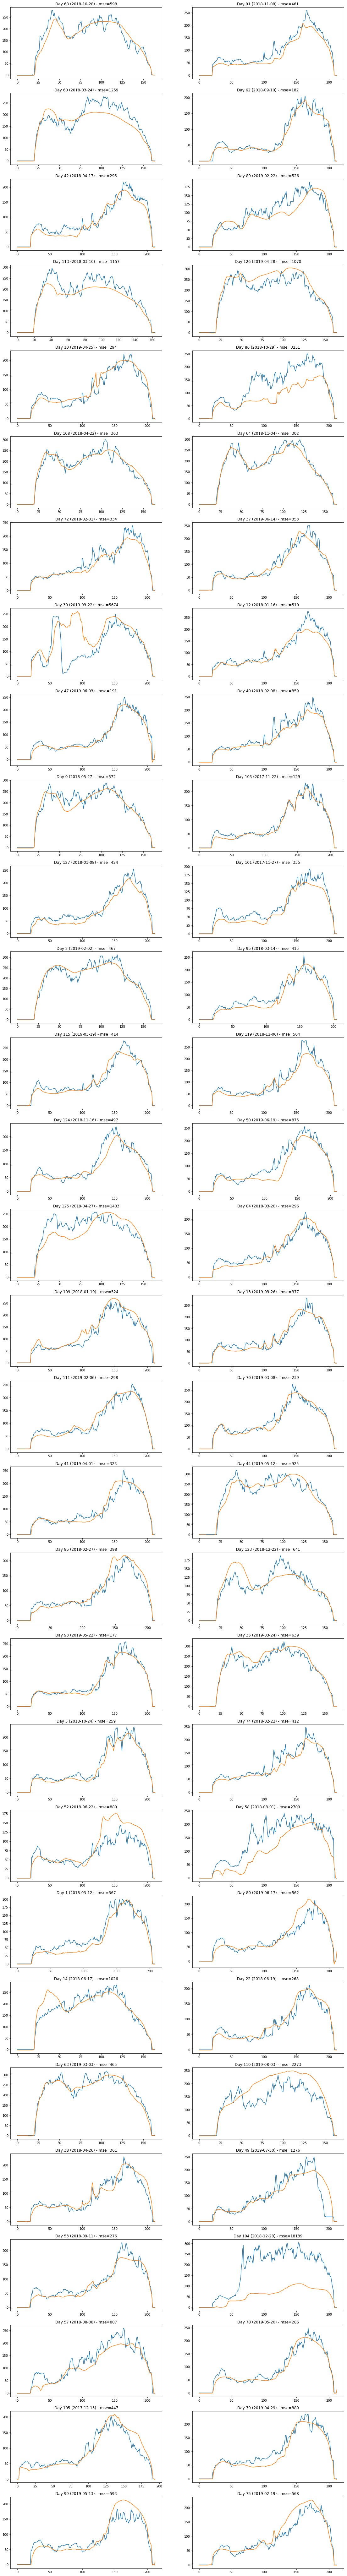

In [5]:
dh.show_n_days_prediction(cnn, columns, 60, time_steps_back, True)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 50)             12400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 32,651
Trainable params: 32,651
Non-trainable params: 0
_________________________________________________________________
None
Train on 70393 samples, validate on 30169 samples
Epoch 1/300
70393/70393 [==============================] - 8s 117us/step - loss: 0.0026 - val_loss: 0.0010
Epoch 2/300
70393/70393 [==============================] - 8s 108us/step - loss: 8.5307e-04 - val_loss: 9.1420e-04
Epoch 3/300
70393/70393 [==============================] - 8s 110us/step - loss: 7.8798e-04 - val_loss:

Epoch 65/300
70393/70393 [==============================] - 8s 107us/step - loss: 6.0817e-04 - val_loss: 7.7506e-04
Epoch 66/300
70393/70393 [==============================] - 7s 106us/step - loss: 6.0426e-04 - val_loss: 7.6394e-04
Epoch 67/300
70393/70393 [==============================] - 8s 109us/step - loss: 6.0670e-04 - val_loss: 7.9557e-04
Epoch 68/300
70393/70393 [==============================] - 7s 106us/step - loss: 6.0676e-04 - val_loss: 7.4496e-04
Epoch 69/300
70393/70393 [==============================] - 8s 107us/step - loss: 6.0576e-04 - val_loss: 7.5635e-04
Epoch 70/300
70393/70393 [==============================] - 8s 107us/step - loss: 6.0058e-04 - val_loss: 8.7176e-04
Epoch 71/300
70393/70393 [==============================] - 8s 108us/step - loss: 6.0293e-04 - val_loss: 7.4876e-04
Epoch 72/300
70393/70393 [==============================] - 8s 108us/step - loss: 5.9924e-04 - val_loss: 7.6839e-04
Epoch 73/300
70393/70393 [==============================] - 8s 107us/ste

70393/70393 [==============================] - 8s 111us/step - loss: 5.5826e-04 - val_loss: 8.0276e-04
Epoch 136/300
70393/70393 [==============================] - 8s 109us/step - loss: 5.5569e-04 - val_loss: 8.1753e-04
Epoch 137/300
70393/70393 [==============================] - 8s 108us/step - loss: 5.5598e-04 - val_loss: 7.6577e-04
Epoch 138/300
70393/70393 [==============================] - 8s 108us/step - loss: 5.5695e-04 - val_loss: 7.6541e-04
Epoch 139/300
70393/70393 [==============================] - 8s 108us/step - loss: 5.5689e-04 - val_loss: 7.6994e-04
Epoch 140/300
70393/70393 [==============================] - 8s 108us/step - loss: 5.5609e-04 - val_loss: 7.9856e-04
Epoch 141/300
70393/70393 [==============================] - 8s 108us/step - loss: 5.5176e-04 - val_loss: 7.8956e-04
Epoch 142/300
70393/70393 [==============================] - 8s 110us/step - loss: 5.5620e-04 - val_loss: 7.5939e-04
Epoch 143/300
70393/70393 [==============================] - 8s 107us/step - l

70393/70393 [==============================] - 8s 110us/step - loss: 5.1921e-04 - val_loss: 8.0877e-04
Epoch 206/300
70393/70393 [==============================] - 8s 107us/step - loss: 5.2304e-04 - val_loss: 8.0424e-04
Epoch 207/300
70393/70393 [==============================] - 8s 107us/step - loss: 5.2184e-04 - val_loss: 8.3437e-04
Epoch 208/300
70393/70393 [==============================] - 8s 109us/step - loss: 5.1852e-04 - val_loss: 8.0566e-04
Epoch 209/300
70393/70393 [==============================] - 8s 107us/step - loss: 5.2256e-04 - val_loss: 8.2817e-04
Epoch 210/300
70393/70393 [==============================] - 8s 107us/step - loss: 5.1768e-04 - val_loss: 8.0610e-04
Epoch 211/300
70393/70393 [==============================] - 8s 107us/step - loss: 5.1948e-04 - val_loss: 7.9658e-04
Epoch 212/300
70393/70393 [==============================] - 8s 107us/step - loss: 5.2084e-04 - val_loss: 8.0596e-04
Epoch 213/300
70393/70393 [==============================] - 8s 110us/step - l

70393/70393 [==============================] - 8s 107us/step - loss: 4.9444e-04 - val_loss: 8.7539e-04
Epoch 276/300
70393/70393 [==============================] - 8s 111us/step - loss: 4.8843e-04 - val_loss: 8.5946e-04
Epoch 277/300
70393/70393 [==============================] - 8s 107us/step - loss: 4.9341e-04 - val_loss: 8.4672e-04
Epoch 278/300
70393/70393 [==============================] - 8s 108us/step - loss: 4.9300e-04 - val_loss: 8.3454e-04
Epoch 279/300
70393/70393 [==============================] - 8s 107us/step - loss: 4.8807e-04 - val_loss: 8.8704e-04
Epoch 280/300
70393/70393 [==============================] - 8s 107us/step - loss: 4.8951e-04 - val_loss: 8.3754e-04
Epoch 281/300
70393/70393 [==============================] - 8s 108us/step - loss: 4.8737e-04 - val_loss: 8.4194e-04
Epoch 282/300
70393/70393 [==============================] - 8s 109us/step - loss: 4.8919e-04 - val_loss: 8.3627e-04
Epoch 283/300
70393/70393 [==============================] - 8s 107us/step - l

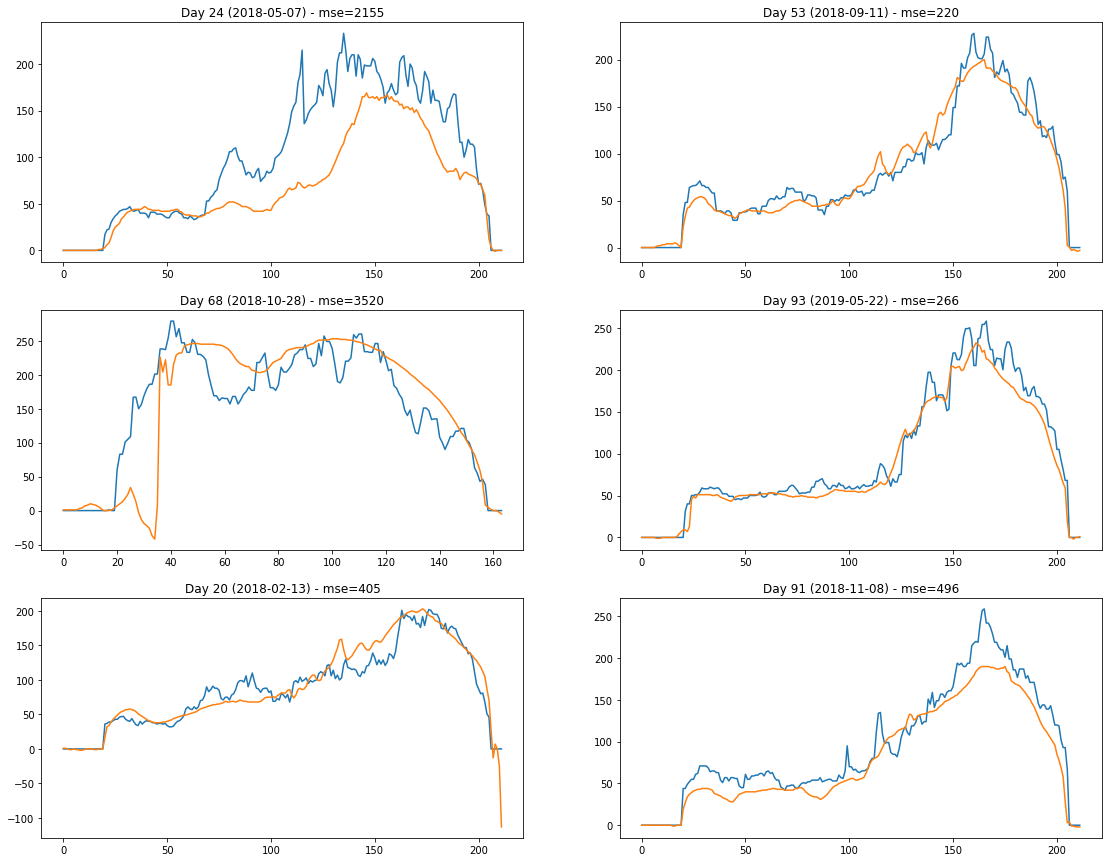

5594.030487804878 2
5583.266666666666 4
5365.2169811320755 5
2525.9447236180904 6
17015.943396226416 12
2896.9150943396226 13
1.089721741732124e+32 14
2574.6341463414633 21
2155.438679245283 24
2266.7264150943397 26
4526.202830188679 30
3214.012195121951 32
2968.1646341463415 33
3025.5548780487807 43
2152.268292682927 44
584258883743.9246 48
2252.6415094339623 49
2881.1158536585367 60


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [4]:
columns = ['pool','lines_reserved','day_of_week','month','minute_of_day','year','reserved_Vodnik','temperature_binned', 'wind_binned', 'humidity_binned', 'precipitation_binned'] 
time_steps_back = 5
x_train, y_train, x_test, y_test = dh.generate_feature_vectors_for_cnn(columns, time_steps_back)
estimator = ConvolutionalNeuralNetwork('lstm_weather')
estimator.time_steps_back = time_steps_back
estimator.columns = columns
n_features = len(estimator.columns)

estimator.model = Sequential()
estimator.model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps_back, n_features)))
estimator.model.add(LSTM(50, activation='relu'))
estimator.model.add(Dense(1))
estimator.model.compile(optimizer='adam', loss='mse')

print(estimator.model.summary())

estimator.fit(x_train, y_train, 300)
dh.show_n_days_prediction(estimator.model, columns, 6, time_steps_back, True)
dh.mse_on_testing_days(estimator.model, columns, time_steps_back, True)

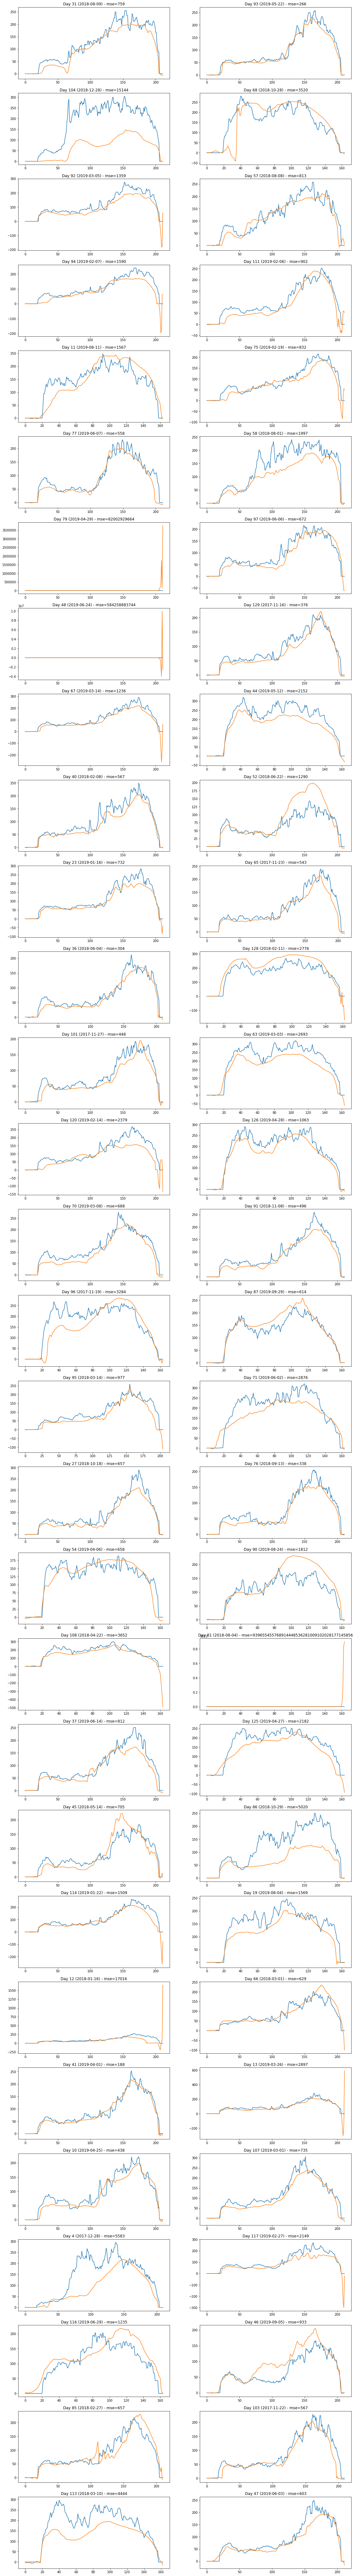

In [5]:
dh.show_n_days_prediction(estimator.model, columns, 60, time_steps_back, True)